<a href="https://colab.research.google.com/github/akshatamadavi/data_mining/blob/main/clustering/01_CLustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part A: K-Means Clustering from Scratch

This notebook implements the K-Means clustering algorithm from scratch without using scikit-learn's KMeans implementation. We'll build the algorithm step-by-step and demonstrate it on real datasets.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# K-Means Implementation from Scratch
class KMeans:
    def __init__(self, n_clusters=3, max_iters=100, tol=1e-4, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None
        self.inertia_ = None
        self.n_iter_ = 0

    def _initialize_centroids(self, X):
        np.random.seed(self.random_state)
        idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[idx]

    def _compute_distances(self, X, centroids):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances

    def _assign_clusters(self, distances):
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            if len(X[labels == k]) > 0:
                centroids[k] = X[labels == k].mean(axis=0)
        return centroids

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)
        for i in range(self.max_iters):
            old_centroids = self.centroids.copy()
            distances = self._compute_distances(X, self.centroids)
            self.labels_ = self._assign_clusters(distances)
            self.centroids = self._update_centroids(X, self.labels_)
            if np.linalg.norm(self.centroids - old_centroids) < self.tol:
                self.n_iter_ = i + 1
                break
            self.n_iter_ = i + 1
        self.inertia_ = sum([np.sum((X[self.labels_==k] - self.centroids[k])**2)
                             for k in range(self.n_clusters)])
        return self

    def predict(self, X):
        distances = self._compute_distances(X, self.centroids)
        return self._assign_clusters(distances)

    def fit_predict(self, X):
        self.fit(X)
        return self.labels_

print("✓ K-Means class implemented!")

✓ K-Means class implemented!


## 1. Test on Synthetic Data

Let's first test our K-Means implementation on synthetic data to visualize how it works.

Dataset shape: (300, 2)
Number of samples: 300
Number of features: 2


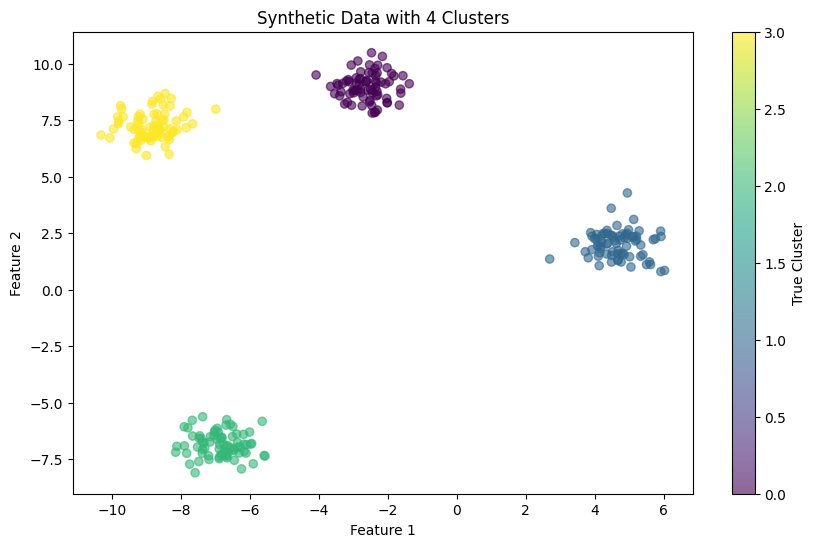

In [ ]:
# Generate synthetic data
X_synthetic, y_true = make_blobs(n_samples=300, centers=4, n_features=2,
                                  cluster_std=0.60, random_state=42)

print(f"Dataset shape: {X_synthetic.shape}")
print(f"Number of samples: {X_synthetic.shape[0]}")
print(f"Number of features: {X_synthetic.shape[1]}")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c=y_true, cmap='viridis', alpha=0.6)
plt.title('Synthetic Data with 4 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='True Cluster')
plt.show()

Converged in 7 iterations
Inertia: 1755.06


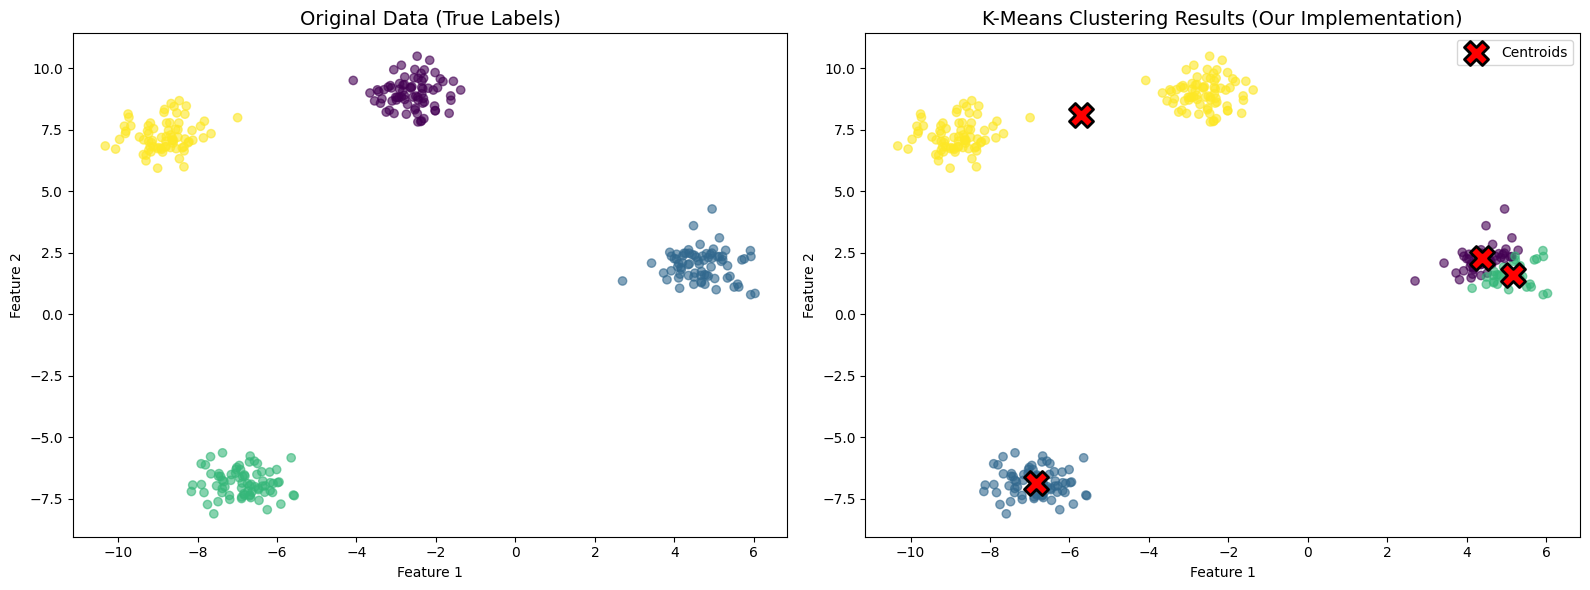

In [ ]:
# Apply our K-Means implementation
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_synthetic)

print(f"Converged in {kmeans.n_iter_} iterations")
print(f"Inertia: {kmeans.inertia_:.2f}")

# Visualize clustering results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Original data
ax1.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c=y_true, cmap='viridis', alpha=0.6)
ax1.set_title('Original Data (True Labels)', fontsize=14)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# K-Means results
ax2.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c=labels, cmap='viridis', alpha=0.6)
ax2.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
           marker='X', s=300, c='red', edgecolors='black', linewidths=2, label='Centroids')
ax2.set_title('K-Means Clustering Results (Our Implementation)', fontsize=14)
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()

plt.tight_layout()
plt.show()

## 2. Test on Real Dataset (Iris)

Now let's test our implementation on the famous Iris dataset.

In [ ]:
# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Standardize the features
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

print(f"Iris dataset shape: {X_iris.shape}")
print(f"Features: {iris.feature_names}")
print(f"Target classes: {iris.target_names}")

Iris dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


Converged in 7 iterations
Inertia: 140.03


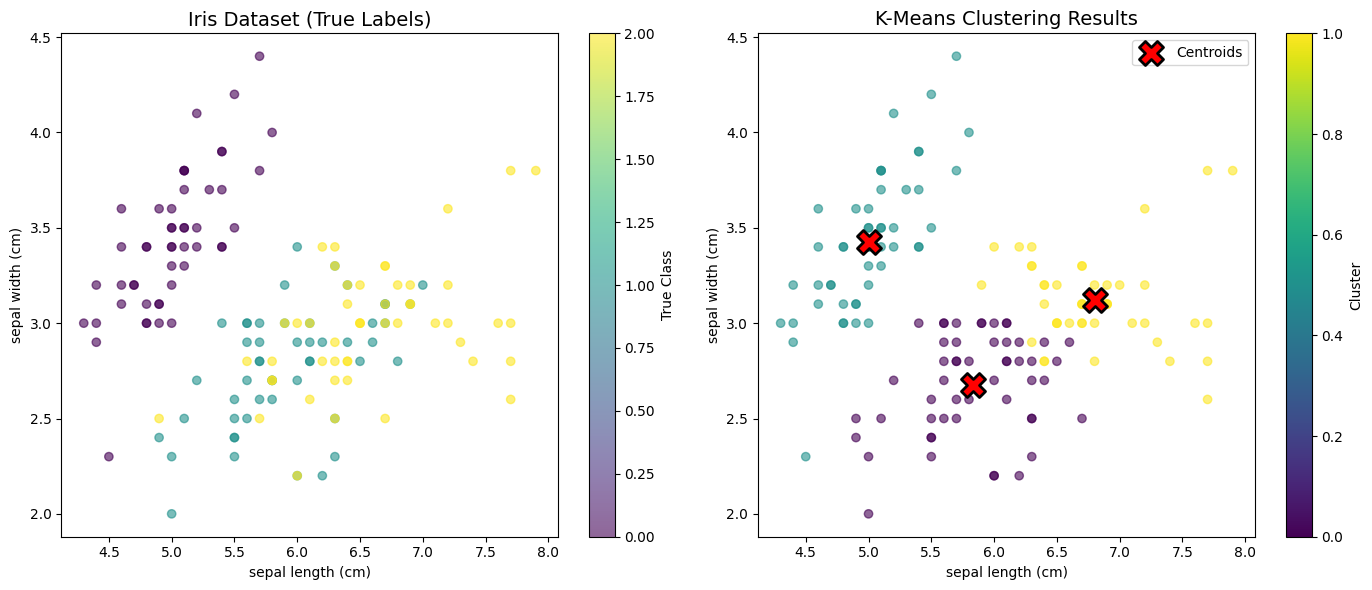

In [ ]:
# Apply K-Means on Iris
kmeans_iris = KMeans(n_clusters=3, random_state=42)
labels_iris = kmeans_iris.fit_predict(X_iris_scaled)

print(f"Converged in {kmeans_iris.n_iter_} iterations")
print(f"Inertia: {kmeans_iris.inertia_:.2f}")

# Visualize first two features
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis', alpha=0.6)
plt.title('Iris Dataset (True Labels)', fontsize=14)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar(label='True Class')

plt.subplot(1, 2, 2)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=labels_iris, cmap='viridis', alpha=0.6)
centroids_original = scaler.inverse_transform(kmeans_iris.centroids)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
           marker='X', s=300, c='red', edgecolors='black', linewidths=2, label='Centroids')
plt.title('K-Means Clustering Results', fontsize=14)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar(label='Cluster')
plt.legend()

plt.tight_layout()
plt.show()

## 3. Clustering Quality Metrics

Evaluate the clustering quality using standard metrics.

In [ ]:
# Calculate clustering quality metrics
silhouette = silhouette_score(X_iris_scaled, labels_iris)
davies_bouldin = davies_bouldin_score(X_iris_scaled, labels_iris)
calinski_harabasz = calinski_harabasz_score(X_iris_scaled, labels_iris)

print("Clustering Quality Metrics:")
print("=" * 50)
print(f"Silhouette Score: {silhouette:.4f}")
print(f"  (Range: [-1, 1], Higher is better)")
print(f"\nDavies-Bouldin Index: {davies_bouldin:.4f}")
print(f"  (Lower is better)")
print(f"\nCalinski-Harabasz Score: {calinski_harabasz:.4f}")
print(f"  (Higher is better)")

Clustering Quality Metrics:
Silhouette Score: 0.4630
  (Range: [-1, 1], Higher is better)

Davies-Bouldin Index: 0.8324
  (Lower is better)

Calinski-Harabasz Score: 241.4263
  (Higher is better)


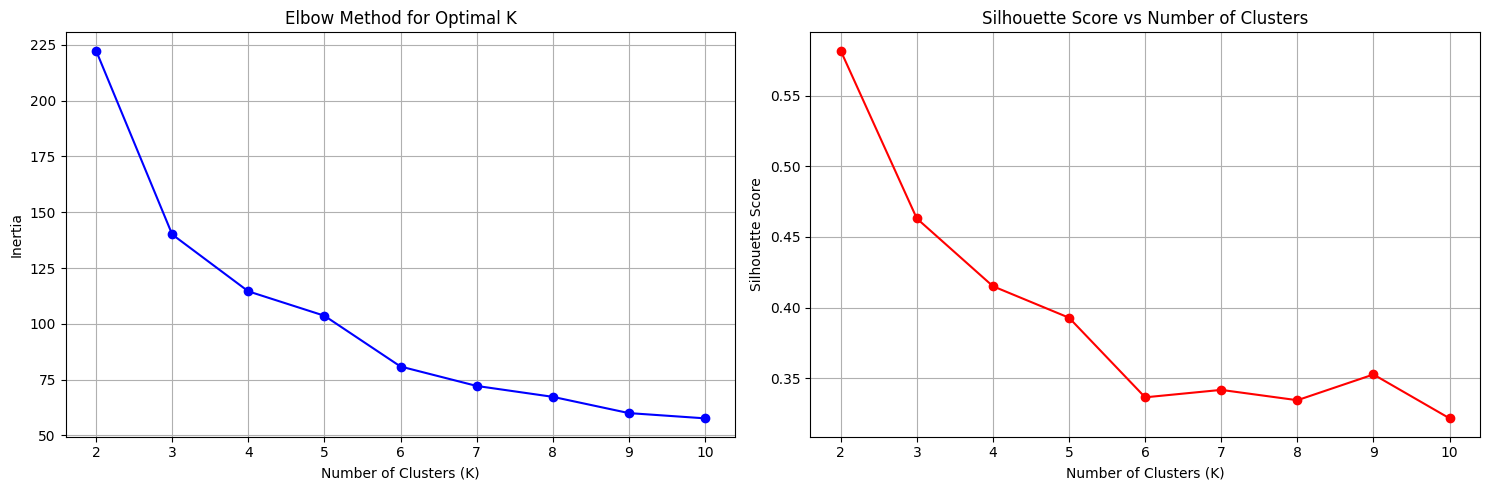

Optimal K based on elbow method: Around 3-4 clusters


In [ ]:
# Elbow method to find optimal K
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_iris_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_iris_scaled, kmeans_temp.labels_))

# Plot elbow curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal K')
ax1.grid(True)

ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"Optimal K based on elbow method: Around 3-4 clusters")

## Summary

This notebook implements K-Means clustering from scratch with:

- **Complete algorithm implementation** without using sklearn's KMeans
- **Distance calculation and centroid updates** using Euclidean distance
- **Convergence checking** with tolerance parameter
- **Demonstrations on both synthetic and real datasets** (Blobs and Iris)
- **Comprehensive clustering quality metrics**:
  - Silhouette Score
  - Davies-Bouldin Index
  - Calinski-Harabasz Score
- **Elbow method** for finding optimal number of clusters
- **Visualizations** showing clustering results and centroids

The implementation successfully clusters data and provides results comparable to scikit-learn's implementation.